<a href="https://colab.research.google.com/github/jpdeleon/chronos/blob/master/notebooks/examples-cluster_spectra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install git+https://github.com/jpdeleon/chronos.git@master

In [2]:
%matplotlib inline
import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [3]:
cc = cr.ClusterCatalog()

In [4]:
cat = cc.query_catalog()
cat.head()

Using CantatGaudin2020 catalog.


,Cluster,raJ2015,decJ2015,GLON,GLAT,r50,Nstars,pmra,pmdec,parallax,distance,X,Y,Z,Rgc,ra,dec
0,ASCC_10,51.870,34.981,155.723,-17.770,0.558,71,-1.737,-1.368,1.459,672.0,-583.3,263.1,-205.1,8927.2,51.870,34.981
1,ASCC_101,288.399,36.369,68.028,11.608,0.372,75,0.934,1.288,2.488,397.3,145.6,360.9,79.9,8202.3,288.399,36.369
2,ASCC_105,295.548,27.366,62.825,2.063,0.648,127,1.464,-1.635,1.783,551.8,251.8,490.5,19.9,8103.0,295.548,27.366
3,ASCC_107,297.164,21.987,58.904,-1.901,0.174,59,-0.155,-5.156,1.109,878.5,453.5,751.9,-29.2,7922.3,297.164,21.987
4,ASCC_108,298.306,39.349,74.378,6.074,0.537,230,-0.519,-1.690,0.838,1154.0,309.0,1105.1,122.1,8106.7,298.306,39.349


In [5]:
mem = cc.query_catalog(return_members=True)
mem.head()

Using CantatGaudin2020 catalog.


,raJ2015,decJ2015,source_id,parallax,pmra,pmdec,RV,phot_g_mean_mag,bp_rp,Proba,Cluster,ra,dec
0,52.756558,34.689531,221090730122510976,1.3799,-1.601,-1.205,NaN,13.0581,0.9138,0.8,ASCC_10,52.756566,34.689536
1,52.730263,34.341461,221065132117493376,1.6550,-2.455,-1.998,NaN,14.7757,1.2807,0.6,ASCC_10,52.730275,34.341469
2,52.684345,34.003600,220988819138630016,1.5876,-2.437,-0.949,NaN,10.8832,0.7241,0.1,ASCC_10,52.684358,34.003604
3,52.676106,34.733687,221094367958697088,1.5586,-1.532,-1.558,NaN,16.8798,1.8380,0.7,ASCC_10,52.676114,34.733694
4,52.712100,34.578004,221083888238423552,1.4173,-1.403,-1.242,NaN,17.9800,2.2854,0.6,ASCC_10,52.712107,34.578009


## cross-match each cluster with TGv8

In [6]:
df = cr.get_TGv8_catalog()

In [ ]:
from tqdm import tqdm

clusters = {}
for cluster in tqdm(mem.Cluster.unique()):
    stars = mem.query("Cluster==@cluster")
    idx = df.Gaia_source_id.isin(stars.source_id)
    clusters[cluster]=df[idx]
    if len(idx)>0:
        print(cluster)

In [8]:
for key in clusters.keys():
    d = clusters[key]
    feh_cols = d.columns[d.columns.str.contains("Fe_H")]
    if d[feh_cols].dropna(how="all", axis=1).shape[1]>2:
        print(key)

ASCC_19
ASCC_41
Alessi_24
Alessi_3
Blanco_1
Collinder_135
Collinder_350


Probability: D=0.99
No data for APOGEE_Fe_H
Probability: D=0.99
Probability: D=0.99
No data for GALAH_Fe_H
Probability: D=0.99
No data for LAMOST_Fe_H
Probability: D=0.99
Probability: D=0.99


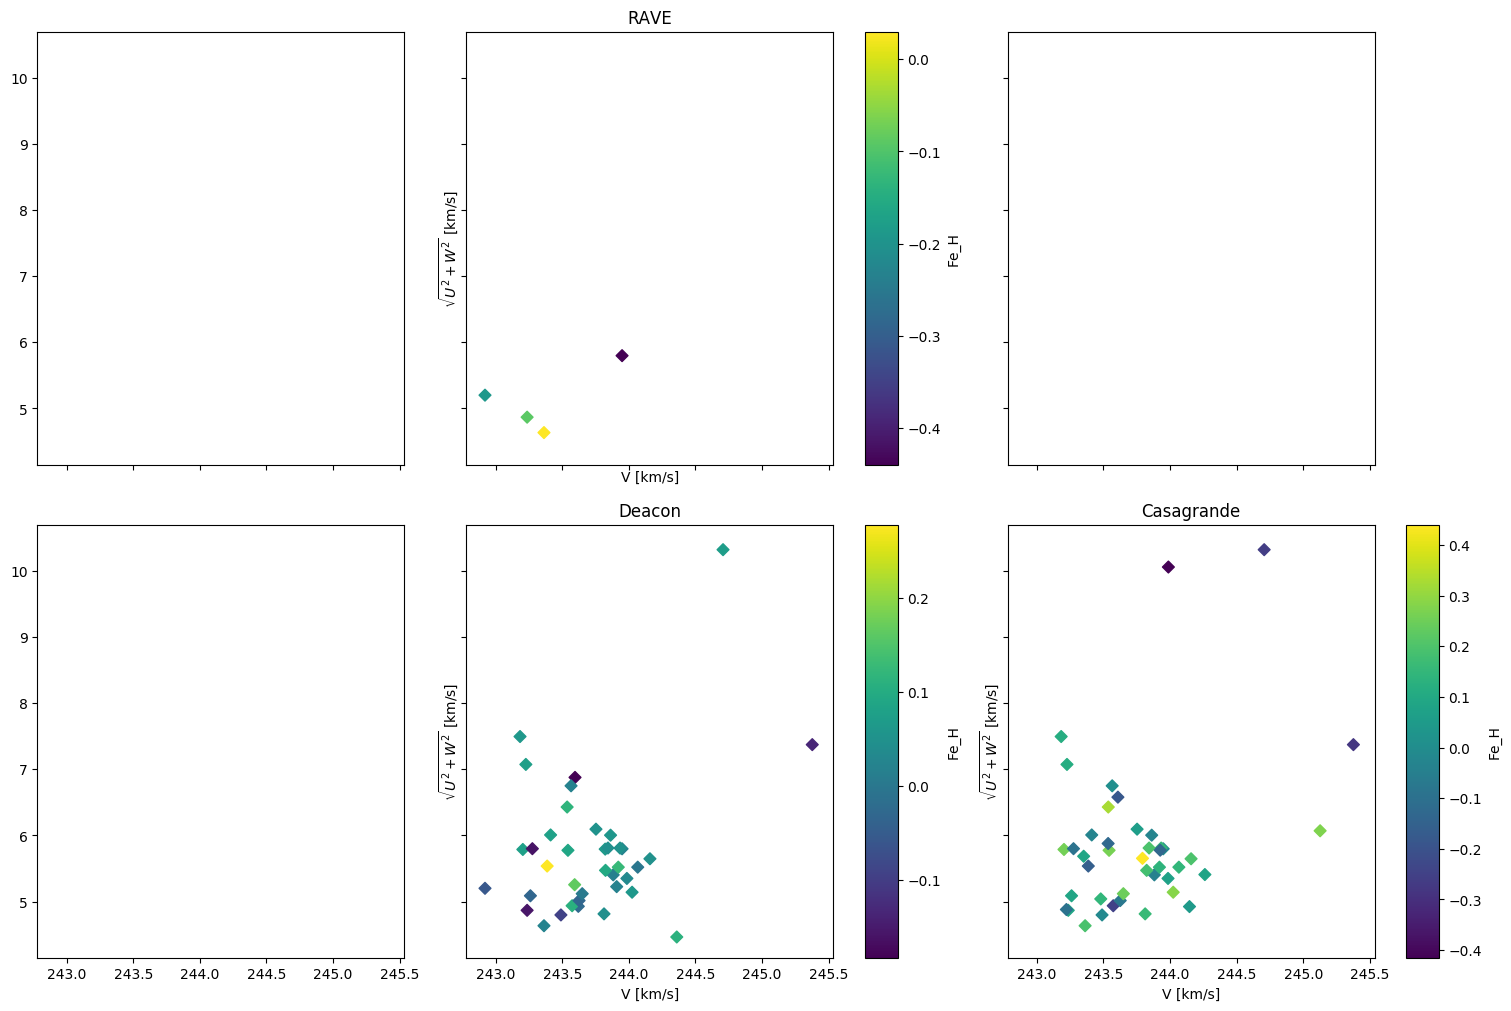

In [15]:
d = clusters["Blanco_1"]
fig = plot_Toomre_diagrams(d, color="Fe_H") #color="Teff"

In [16]:
d.columns

Index(['Gaia_source_id', 'Gaia_RA', 'Gaia_Dec', 'Gaia_parallax',
       'Gaia_e_parallax', 'Gaia_pmra', 'Gaia_e_pmra', 'Gaia_pmdec',
       'Gaia_e_pmdec', 'Gaia_vrad', 'Gaia_e_vrad', 'Gaia_G_mag',
       'Gaia_G_mag_error', 'Gaia_BP_mag', 'Gaia_BP_mag_error', 'Gaia_RP_mag',
       'Gaia_RP_mag_error', 'Marchetti_U', 'Marchetti_el_U', 'Marchetti_eu_U',
       'Marchetti_V', 'Marchetti_el_V', 'Marchetti_eu_V', 'Marchetti_W',
       'Marchetti_el_W', 'Marchetti_eu_W', 'Marchetti_vtot',
       'Marchetti_el_vtot', 'Marchetti_eu_vtot', 'Bailer-Jones_r_est',
       'Bailer-Jones_r_lo', 'Bailer-Jones_r_hi', '2MASS_ID', 'TICID',
       'TESS_RA', 'TESS_Dec', 'GLONG', 'GLAT', 'TESSMAG', 'PRIORITY', 'HIP',
       'TYCHO2', 'TD_D', 'TD_D_le', 'TD_D_ue', 'TD_H', 'TD_H_le', 'TD_H_ue',
       'D', 'TD', 'H', 'APOGEE_Fe_H', 'APOGEE_Teff', 'APOGEE_logg',
       'APOGEE_alpha', 'GALAH_Fe_H', 'GALAH_Teff', 'GALAH_logg', 'GALAH_alpha',
       'RAVE_Fe_H', 'RAVE_Teff', 'RAVE_logg', 'RAVE_alpha', 'LAMOST_

## TOIs

### Thin disk planetary systems

In [ ]:
tois_thin_disc = cr.get_tois_in_TGv8_catalog(query_str="D>0.9")
fig = plot_Toomre_diagrams(tois_thin_disc)

### Thick disk planetary systems

In [ ]:
tois_thick_disc = cr.get_tois_in_TGv8_catalog(query_str="TD>0.9")
fig = plot_Toomre_diagrams(tois_thick_disc)